In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [5]:
# Mall_Customer 데이터로 고객 군집화 실습
# 데이터 불러오기 Mall_Customers.csv
df = pd.read_csv('./data/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [9]:
# 1. 두 가지 feature에 대한 고객 군집화를 진행하려고 합니다. 
# Annual Income (k$) , Spending Score (1-100) 두 feature를 변수 data에 저장한 후 정규화를 수행하시오

# 데이터 인덱싱
data = df[['Annual Income (k$)','Spending Score (1-100)']]

# 정규화
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [10]:
# 2. eps = 0.5 , min_samples = 2 로 DBSCAN 객체 생성 후 모델 학습 및 예측 결과를 저장하시오
model = DBSCAN(eps = 0.5, min_samples = 2)
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


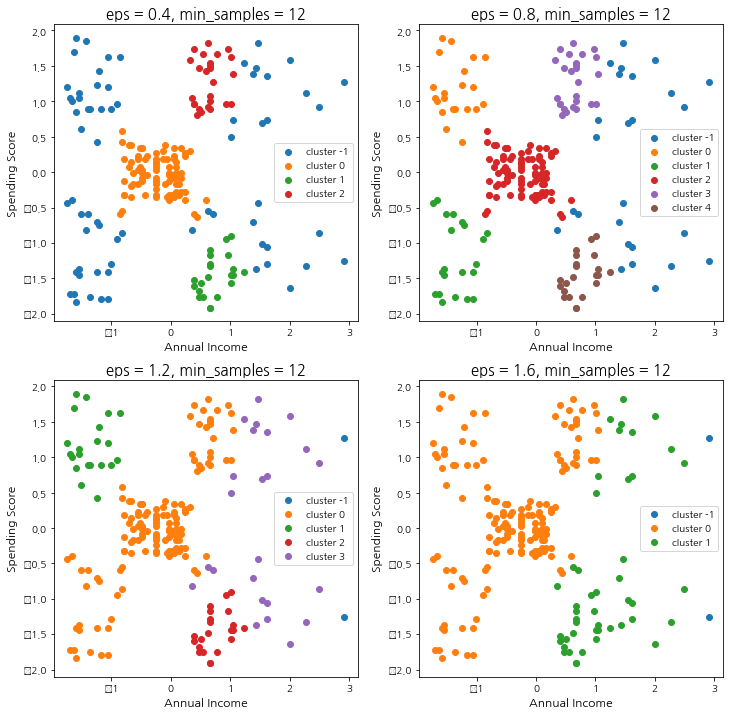

In [13]:
# 시각화 함수
# 다중 플롯 동시 시각화
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4):
    # epsilon을 증가시키면서 반복
    eps = 0.4 * (i + 1)
    min_samples = 12

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)

    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(df_scale.loc[df_scale['cluster'] == j, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == j, 'Spending Score (1-100)'], 
                        label = 'cluster ' + str(j))

    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)
plt.show()

In [ ]:
# 3. 위 그래프는 min_samples는 12로 고정한 후 eps값을 바꾸며 군집화를 여러차례 실행한 결과를 나타낸 그래프들이다.
# 위 그래프를 보고 가장 이상적인 군집화 결과로 판단되는 eps값은 무엇인지 쓰시오
# 힌트 : -1 은 이상치

- eps가 너무 낮으면 비교적 가까운 점들도 같은 군집으로 형성되기 어렵고
- eps가 높은 경우는 대부분 점들이 모두 같은 군집으로 포함됨
- 따라서 위 결과에서는 eps = 0.8인 경우 가장 이성적인 군집화 결과로 판단됨

#### 구남이

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### 데이터는 유방암 데이터입니다. Class 열에서 2는 초기 , 4는 악성을 의미합니다.

tumor_df_org = pd.read_csv('./data/tumor.csv')
tumor_df_org.head(3)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [16]:
# 군집화를 위해 Sample code number열과 Class열 삭제
tumor_df = tumor_df_org.iloc[:,1:-1]

In [17]:
# 1. kmeans 군집화 수행
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
kmeans.fit_predict(tumor_df)

tumor_df['Class'] = tumor_df_org['Class']
tumor_df['cluster'] = kmeans.labels_
tumor_df.head(5)

<ipython-input-17-558341bdef20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_df['Class'] = tumor_df_org['Class']


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,cluster
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,1
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,1
4,4,1,1,3,2,1,3,1,1,2,0


In [26]:
# 2. cluster와 class별로 count해서 k-means clustering 결과 확인하기
tumor_df_result = tumor_df.groupby(['cluster','Class']).count()
print(tumor_df_result)
### 2차원 평면에 시각화하기위해 PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(tumor_df.iloc[:,:-2])

tumor_df['pca_x'] = pca_transformed[:,0]
tumor_df['pca_y'] = pca_transformed[:,1]
tumor_df.head(3)

               Clump Thickness  Uniformity of Cell Size  \
cluster Class                                             
0       2                  435                      435   
        4                   18                       18   
1       2                    9                        9   
        4                  221                      221   

               Uniformity of Cell Shape  Marginal Adhesion  \
cluster Class                                                
0       2                           435                435   
        4                            18                 18   
1       2                             9                  9   
        4                           221                221   

               Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
cluster Class                                                              
0       2                              435          435              435   
        4                               18  

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,cluster,pca_x,pca_y
0,5,1,1,1,2,1,3,1,1,2,0,-4.545817,0.016132
1,5,4,4,5,7,10,3,2,1,2,1,4.731615,-4.679072
2,3,1,1,1,2,2,3,1,1,2,0,-4.695274,-0.606581


Text(0.5, 1.0, 'K-means clustring by 2 PCA Components')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


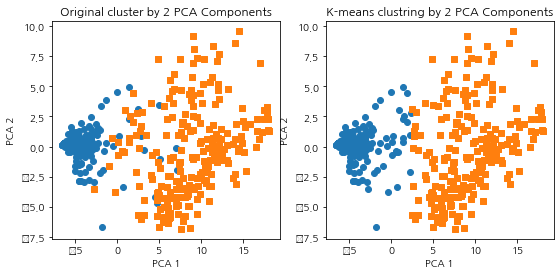

In [33]:
### 결과 시각화
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
# 3. 원래 타겟 변수 값이 2, 4인 경우마다 별도의 인덱스로 추출
marker0_ind = tumor_df[tumor_df['Class']==2].index
marker1_ind = tumor_df[tumor_df['Class']==4].index

# 4. 원래 타겟 변수 값 2, 4에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출
ax1.scatter(x=tumor_df.loc[marker0_ind, 'pca_x'], y=tumor_df.loc[marker0_ind, 'pca_y'], marker='o')
ax1.scatter(x=tumor_df.loc[marker1_ind, 'pca_x'], y=tumor_df.loc[marker1_ind, 'pca_y'], marker='s')

ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('Original cluster by 2 PCA Components')

# 5. 군집 값이 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = tumor_df[tumor_df['cluster']==0].index
marker1_ind = tumor_df[tumor_df['cluster']==1].index

# 6. 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출
ax2.scatter(x=tumor_df.loc[marker0_ind, 'pca_x'], y=tumor_df.loc[marker0_ind, 'pca_y'], marker='o')
ax2.scatter(x=tumor_df.loc[marker1_ind, 'pca_x'], y=tumor_df.loc[marker1_ind, 'pca_y'], marker='s')

ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('K-means clustring by 2 PCA Components')

#### 강수민

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [35]:
# Q1. make_blobs() 를 사용해 총 300개의 레코드와 2개의 피처가 5개의 군집화 기반 분포도를 가진 
# 피처 데이터 세트 X와, 동시에 5개의 군집화 값을 가진 타깃 데이터 세트 y가 반환되도록 하라.
# cluster_std=0.8, random_state=0 으로 설정

X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=0.8, random_state=0)

unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

[0 1 2 3 4] [60 60 60 60 60]


In [36]:
# Q2. 생성된 X, y 를 dataframe으로 변경하기 (columns=['col1', 'col2'])

clusterDF = pd.DataFrame(data=X, columns=['col1', 'col2'])
clusterDF['target'] = y
clusterDF.head(3)

,col1,col2,target
0,10.153483,-1.292752,4
1,-0.345381,8.232261,3
2,0.420616,4.184080,0


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


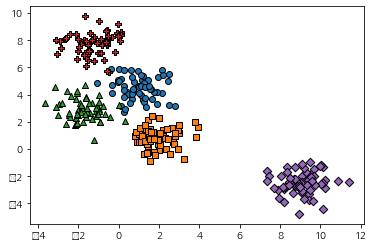

In [37]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 4개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2, 3, 4]
# target==0, target==1, target==2, target==3, target==4 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['col1'], y=target_cluster['col2'], edgecolor='k',
                marker=markers[target])

plt.show()

In [38]:
# Q3. k=5, init='k-means++', max_iter=300, random_state=0 으로 설정해 kmeans 객체 생성하기
# Q4. kmeans 클러스터링 수행해 cluster_labels 객체 생성

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
cluster_labels =  kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


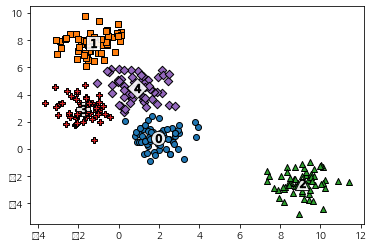

In [39]:

# Q5. 개별 클러스터의 중심 위치 좌표 추출하기

centers =kmeans.cluster_centers_

unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['col1'], y=label_cluster['col2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [40]:
# Q6. kmeans 클러스터링이 잘 되었는지 확인(hint: groupby())
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       4               60
1       0               60
2       3               58
        0                1
        4                1
3       1               58
        4                2
4       2               60
Name: kmeans_label, dtype: int64


#### 박민영

In [45]:
# 1. make_blobs()를 이용하여 2개의 feature와 4개의 군집 중심점을 가지는 임의의 데이터 300개를 생성하여라.
# 이 때, cluster_std = 0.8, random_state = 0으로 설정하여라.
import numpy as np
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.8, random_state=0)

In [46]:
# 2. MeanShift 모듈을 이용해 bandwidth를 0.8로 하여 군집화를 수행하여라.
# 수행 후 고유 클러스터 라벨을 확인하여 몇 개의 군집으로 군집화가 수행되었는지 확인하여라.

from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [47]:
# 3. 커널함수의 bandwidth의 크기를 1로 증가 후에 2번에서 수행한 MeanShift 군집화를 재수행하여라.
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3]


In [49]:
# 4. estimate_bandwidth()를 이용해 최적의 bandwidth 값을 소수점 셋째자리에서 빈올림하여 계산하여라.

from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 2.868


In [50]:
# 5. 최적화된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화를 수행하여라.
# 단, 데이터 갯수 필터링 비율을 0.25로 설정하여라.
# 아래 코드의 빈칸을 채워라.

import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

# 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile = 0.25)

meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass bandwidth=2.3508364052076667 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


cluster labels 유형 : [0 1 2]
